# Ex 2: Frequency Analysis

## Background
    
Frequency analysis of hydrologic variables, broadly defined as the quantification of the expected number of occurrences of an event of a given magnitude, is perhaps the earliest and most frequent application of probability and statistics in the field of water resources engineering. In brief, the methods of frequency analysis, as applied to maxima, aim to estimate the probability with which a random variable will be equal to or greater than a given quantile, from a sample of observed data. Frequency analysis of minima is similar, but non-exceedance probabilities are of concern. If only data recorded at a single streamflow (or rainfall) gauging station are available, an at-site frequency analysis is being carried out. Otherwise, if other observations of the variable, as recorded at distinct gauging stations within a specified region, are jointly employed for statistical inference, then the frequency analysis is said to be regional.

In short: a "100-year flood" refers to a flood magnitude that statistically has a 1/100 = 0.01 = 1% probability of being equaled or exceeded in any given year. Generally, the probability of a "T-year flood" to be equaled or exceeded in any given year is 1/T.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

## Question 1:

Vägverket (the Swedish Road Administration) plans to build a new bridge and they ask you to provide some information about the frequency and magnitude of the discharges in the river. Of course, you are a very careful consultant, so you are going to apply different statistical methods. Yearly peak flows can be found in the file **Qyearly.dat.**

### Calculate the magnitude of a 100-year flood by using 
#### A. Graphic method:

- Compute the empirical probability for a certain flow to be exceeded $\Pr\left[X>x_m\right]$ using the Weibull equation

    $\Pr\left[X > x_m \right] = \dfrac{m}{N+1}$

    where $m$ is the rank number of $x_m$ after $\left\{\left.x_i\right|i=1,\ldots,N\right\}$ have been sorted in descending order, and $N$ is the number of years.

- plot both $\Pr\left[X>x_m\right]$ and $\Pr\left[X<x_m\right]$ against $x_m$, naming the axes properly.

- You want to read the $Q_{T = 100}$ (i.e. the hundred-year-flood) from the plot. What is the problem? Would it help to have a larger number of observations (why/why not)?

In [2]:
data = pd.read_table("Qyearly.dat",index_col = 0, parse_dates = True)
data.head()

,Q(m3/s)
Year,
1924-01-01,99.1
1925-01-01,79.2
1926-01-01,62.6
1927-01-01,93.7
1928-01-01,68.7


In [3]:
# finn m og så bruk formelen

#data['sort']=data['Q(m3/s)'].sort_values(ascending=False)
data['sort']=np.sort(a=data['Q(m3/s)'])[::-1]

data["rank"]=np.arange(1,38,1)


m=data['rank']
N=data.shape[0]

data["wp"]=m/(N+1)

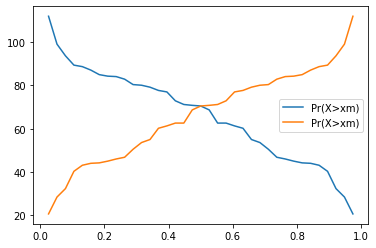

In [4]:
#Plotting

plt.plot(data['wp'],data['sort'],label='Pr(X>xm)')
plt.plot(1-data['wp'],data['sort'],label='Pr(X>xm)')

plt.legend()
plt.show()
         

In [5]:
#If we want to read the Q_t=100 we need more data. this dataset is too short, as we dont even have 100 observations in the dataset.

####Calculate the magnitude of a 100-year flood by using 
#### B. Analytical methods assuming the yearly peak flow follows the

1. Normal distribution
2. Log-normal distribution
3. Extreme-value type I (Gumbel) distribution
4. Pearson III distribution
5. Log-Pearson III distribution

Use the frequency factor method (see pages 60-64 in the [compendium](https://uio.instructure.com/files/1381788/download?download_frd=1) you find in Canvas --> Files --> Reading materials):

$$Q_T = \overline{Q} + K_T \cdot S_Q$$

where $\overline{Q}$ and $S_Q$ are the sample mean and standard deviation of $Q$. Note that
- $K_T$ for the normal and both Pearson distributions can be obtained from tables (after page 156 in the compendium).
- For the normal distribution you can also use the *ppf* method/function of [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to compute the quantile corresponding to a given cumulated density value and mean and standard deviation parameters (the *ppf* function is the inverse of the cumulative density function *cdf*).
- For the lognormal distribution you can follow the steps in section 6.2 of the compendium.
- For the Extreme value type I (Gumbel) distribution it is
  $$ K_T = - \frac{\sqrt{6}}{\pi } \left \{ 0.5772 + \text{ln}\left [ \text{ln}\left ( \frac{T}{T-1} \right ) \right ] \right \}$$

In [6]:
from scipy.stats import norm
from scipy.stats import skew

#Normal distribution
mean=data['Q(m3/s)'].mean()
std=data['Q(m3/s)'].std()

K_T=norm.ppf(1-0.01)
Q_T=mean+K_T*std


print(Q_T,'Normal')

#log-Normal Distribution

sd2=std**2
m2=mean**2

ym=np.log(m2/(np.sqrt(sd2+m2)))


v=sd2/m2
v2=v+1

Sy= np.sqrt(np.log(v2))
                   
Yt=ym+K_T*Sy

Xt=np.exp(Yt)

print(Xt,'log-normal')

#Extreme-value type I (Gumbel) distribution
T1=100

K_t1=-((np.sqrt(6))/np.pi)*(0.5772+np.log(np.log(T1/(T1-1))))
Q_t1=mean+std*K_t1

print(Q_t1,'extreme-value type 1')

#Pearson III distribution
skew1=skew(data['Q(m3/s)'])

T100=100

k=skew1/6

prob=1/T100
 
w=(np.log(1/(prob**2)))**(1/2)
   
zup=2.516+0.8029*w +0.01033*(w**2)
   
zlow=1+1.4328*w +0.1893*(w**2) +0.00131*(w**3)
   
z=w-(zup/zlow)

h1=((z**2) -1)*k
h2=(1/3)*((z**3)-6*z)*(k**2)
h3=((z**2)-1)*(k**3)
h4=z*(k**4)
h5=(1/3)*(k**5)

K_t2=z+h1+h2-h3+h4+h5

X_t2=mean+K_t2*std

print(X_t2,'pearson')


#Log-Pearson III distribution
skew2=skew(data['Q(m3/s)'])


y=np.log(data['Q(m3/s)'])
ym1=y.mean()
std3=y.std()

#K_T form table in compendium:2.178
K_t3=2.178

Yt2=ym1+K_t3*std3

Q_t3=np.exp(Yt2)

print(Q_t3,'log-Pearson')

115.77626956679757 Normal
130.78666297221812 log-normal
133.02719948560795 extreme-value type 1
113.27615065587631 pearson
140.63793647809905 log-Pearson


#### Hint:
Construct a table similar to the one below and complete the table to answer the questions:  

Year|Q(m³/s)|Sorted|Rank |Weibull probability|
--- |---   |---|---|--
1924| 99.1 |.. |.. |..
1925|79.2  |.. |.. |..
    
    

1) Read the table by using `pd.read_table('Qyearly.dat')`

2) Sort the discharge by using the method `pd.DataFrame.sort_values()`

3) Assign the rank by using the `np.arange(1, 38)` that means generating an array of integer values from 1 to 37. You can store the ranks as a new column called `"rank"` to dataframe `df`, by writing `df["rank"]=np.arange(1,38,1)`

4) use `scipy.stats.norm.ppf(p)` for finding the table value of `z`. Where `p` is the probability.

5) For converting the value to the logarithm, you can use `np.log(value)`. Note that `np.log` is natural or base-*e* logarithm, whereas `np.log10` is base-10 logarithm.

6) Skewness can be calculated by `scipy.stats.skew(values)`.

### Question 2: 
Calculate the probability that the annual peak flood is larger than 80 m³/s for any given year. Assume that the annual maximum discharge follows a normal distribution (use mean and standard deviation from question 1).

In [7]:
from scipy.stats import norm

mean=data['Q(m3/s)'].mean()
std=data['Q(m3/s)'].std()

#larger than 80 m3/s
large80=1-norm(mean, std).cdf(80)

print(large80)

0.2591982490131649


### Question 3: 
In order to be 90% sure that a design flood is not exceeded in a 50 year period (design life), what shall be the design return period?

In [8]:
#90% means a risk of 10%, 0.1
risk=0.1
years=50

#risk=1-(1-(1/T)**(years))
T=1/(1-(1-risk)**(1/years))


print(T)

475.06125465234106


### Question 4:
Calculate the magnitude of the flow that with a probability of 0.9 is not exceeded in 5 years. Use a normal distribution with mean and standard deviation from question 1.

In [9]:
mean=data['Q(m3/s)'].mean()
std=data['Q(m3/s)'].std()
#pp5=norm(mean, std).ppf(0.9**5)

#print(pp5)

risk2=0.1
years1=5

pp9=1-(1-risk2)**(1/years1)


mm5=norm(mean, std).ppf(1-pp9)

print(mm5)

109.6051272706525


### Question 5: 
Define and explain the return period.

In [10]:
#return intervall= (n+1)/m
#n=number of years recorded
#m=rank of decreasingly rnaked observations

#A return period is the time intervall between reoccurences of an event.

### Question 6: 
In a small brook, we have estimated that the discharge 5 m³/s corresponds to the flow that is exceeded with a return period of 10 years. What is the probability that this value is not exceeded five years in a row?

In [11]:
#from background:The probability of a "T-year flood" to be equaled or exceeded in any given year is 1/T
yrs=10
pr=1/yrs

pex=(1-pr)**5

print(pex)

0.5904900000000001


### Question 7:
For a different river, we assume that the discharge $Q_t$ (m$^3$/s) observed after a period of $t$ consecutive days without is approximately modelled by
$$Q_t = 25 \exp\left(-\dfrac{t}{20}\right)$$
where $t$ is a stochastic variable following the Gumbel cumulative distribution function
$$F\left(t\right) = \exp\left(-\exp\left(-a\left(t-u\right)\right)\right)$$
with parameters $u = 18$ and $a = 0.15$.

What is the probability that $Q_t$ reaches a value lower than 10 m$^3$/s?

In [12]:
u=19 #mean?
a=0.15 #std?

Q_t4=10

#np.log(Q_t4/25)=-(t/20)

t=-20*np.log(Q_t4/25)

F=np.exp(-np.exp(-a*(t-u)))


#we take 1-F bacause the formula is for probability that Q_t reaches value higher than 10
print(1-F)

0.6692584544603557
